In [1]:
# Pre Req Imports
import matplotlib.pyplot as plt
import pandas as pd
import io
import os
import csv
import numpy as np
import requests
import json
import scipy.stats as st


In [2]:
#import CSV
PropertyOff_to_load = "Resources/B Property and deception offences.csv"

In [3]:
#convert to csv
po_property_merged = pd.read_csv(PropertyOff_to_load)
#po_property_merged

,Year,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Count,Median
0,2013,Yarra,3067,Abbotsford,B Property and deception offences,B10 Arson,3,792500
1,2013,Yarra,3067,Abbotsford,B Property and deception offences,B20 Property damage,75,792500
2,2013,Yarra,3067,Abbotsford,B Property and deception offences,B30 Burglary/Break and enter,127,792500
3,2013,Yarra,3067,Abbotsford,B Property and deception offences,B40 Theft,359,792500
4,2013,Yarra,3067,Abbotsford,B Property and deception offences,B50 Deception,166,792500
...,...,...,...,...,...,...,...,...
36408,2022,Murrindindi,3717,Yea,B Property and deception offences,B50 Deception,8,610000
36409,2022,Latrobe,3869,Yinnar,B Property and deception offences,B20 Property damage,7,562500
36410,2022,Latrobe,3869,Yinnar,B Property and deception offences,B30 Burglary/Break and enter,4,562500
36411,2022,Latrobe,3869,Yinnar,B Property and deception offences,B40 Theft,10,562500


In [4]:
# filter by theft
theft_data = po_property_merged[po_property_merged["Offence Subdivision"] == "B40 Theft"]
groupedtheft_data = theft_data.groupby("Offence Count").count()
#theft_data.head(25)

,Year,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Count,Median
3,2013,Yarra,3067,Abbotsford,B Property and deception offences,B40 Theft,359,792500
7,2013,Moonee Valley,3040,Aberfeldie,B Property and deception offences,B40 Theft,31,947500
11,2013,Surf Coast,3231,Aireys Inlet,B Property and deception offences,B40 Theft,3,664000
15,2013,Moonee Valley,3042,Airport West,B Property and deception offences,B40 Theft,361,532000
20,2013,Brimbank,3021,Albanvale,B Property and deception offences,B40 Theft,145,313000
25,2013,Port Phillip,3206,Albert Park,B Property and deception offences,B40 Theft,186,1360000
30,2013,Brimbank,3020,Albion,B Property and deception offences,B40 Theft,183,379000
35,2013,Murrindindi,3714,Alexandra,B Property and deception offences,B40 Theft,20,261000
40,2013,Ballarat,3350,Alfredton,B Property and deception offences,B40 Theft,121,361500
46,2013,Moyne,3277,Allansford,B Property and deception offences,B40 Theft,3,310000


In [5]:
#group by suburb
theftsummed_data = theft_data.groupby(["Suburb/Town Name", "Year"])["Offence Count", "Median"].sum().reset_index()
theftsummed_data = theftsummed_data.rename(columns={"Offence Count": " Thefts", "Suburb/Town Name": "Suburb"})
theftsummed_data.head(20)

C:\Users\shang\AppData\Local\Temp\ipykernel_11372\694830416.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  theftsummed_data = theft_data.groupby(["Suburb/Town Name", "Year"])["Offence Count", "Median"].sum().reset_index()


,Suburb,Year,Thefts,Median
0,Abbotsford,2013,359,792500
1,Abbotsford,2014,467,862500
2,Abbotsford,2015,614,925000
3,Abbotsford,2016,640,1187500
4,Abbotsford,2017,590,1280000
5,Abbotsford,2018,766,1192500
6,Abbotsford,2019,656,1050000
7,Abbotsford,2020,625,1200000
8,Abbotsford,2021,573,1375000
9,Abbotsford,2022,530,1517500


In [6]:
# Data from the year 2022 only
theftsummed_data_2022 = theft_data[theft_data["Year"] == 2022].groupby(["Year", "Suburb/Town Name"])[["Offence Count", "Median"]].sum().reset_index()
theftsummed_data_2022 = theftsummed_data_2022.rename(columns={"Offence Count": "Thefts", "Suburb/Town Name": "Suburb"})
theftsummed_data_2022 = theftsummed_data_2022.sort_values(["Thefts"] , ascending=False)
theftsummed_data_2022.head(50)

,Year,Suburb,Thefts,Median
253,2022,Fitzroy,2213,1542500
551,2022,Preston,1806,1252500
189,2022,Dandenong,1748,715000
262,2022,Frankston,1671,779000
627,2022,St Kilda,1416,1515000
561,2022,Reservoir,1345,966000
618,2022,South Yarra,1319,3300000
712,2022,Werribee,1305,620500
563,2022,Richmond,1304,1385000
439,2022,Mildura,1301,439500


The correlation between Thefts and Median House Price is 0.18


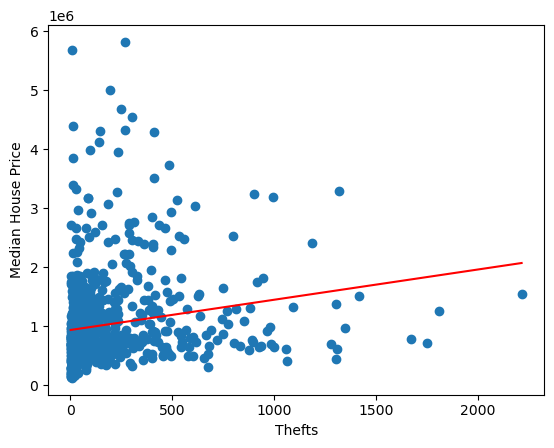

In [8]:
#correlation and regression plot
(slope, intercept, rvalue, pvalue, sterr) = st.linregress(theftsummed_data_2022["Thefts"], theftsummed_data_2022["Median"])
regress_values = theftsummed_data_2022["Thefts"] * slope + intercept
plt.plot(theftsummed_data_2022["Thefts"],regress_values,color = "red")                                                                                                         
Thefts = theftsummed_data_2022["Thefts"]
Median = theftsummed_data_2022["Median"]
correlation = st.pearsonr(Thefts,Median)
plt.scatter(theftsummed_data_2022["Thefts"], theftsummed_data_2022["Median"])
plt.xlabel("Thefts")
plt.ylabel("Median House Price")
print(f"The correlation between Thefts and Median House Price is {round(correlation[0],2)}")
plt.show()

In [9]:
# property damage groupby
damage_data = po_property_merged[po_property_merged["Offence Subdivision"] == "B20 Property damage"]
groupeddamage_data = theft_data.groupby("Offence Count").count()
#damage_data.head(25)

,Year,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Count,Median
1,2013,Yarra,3067,Abbotsford,B Property and deception offences,B20 Property damage,75,792500
5,2013,Moonee Valley,3040,Aberfeldie,B Property and deception offences,B20 Property damage,14,947500
9,2013,Surf Coast,3231,Aireys Inlet,B Property and deception offences,B20 Property damage,4,664000
13,2013,Moonee Valley,3042,Airport West,B Property and deception offences,B20 Property damage,44,532000
18,2013,Brimbank,3021,Albanvale,B Property and deception offences,B20 Property damage,32,313000
23,2013,Port Phillip,3206,Albert Park,B Property and deception offences,B20 Property damage,40,1360000
28,2013,Brimbank,3020,Albion,B Property and deception offences,B20 Property damage,41,379000
33,2013,Murrindindi,3714,Alexandra,B Property and deception offences,B20 Property damage,24,261000
38,2013,Ballarat,3350,Alfredton,B Property and deception offences,B20 Property damage,37,361500
42,2013,Moyne,3277,Allansford,B Property and deception offences,B20 Property damage,1,310000


In [10]:
#group by suburb
damagesummed_data = damage_data.groupby(["Suburb/Town Name", "Year"])["Offence Count", "Median"].sum().reset_index()
damagesummed_data = damagesummed_data.rename(columns={"Offence Count": "Damange_Crimes", "Suburb/Town Name": "Suburb"})
#damagesummed_data.head(20)

C:\Users\shang\AppData\Local\Temp\ipykernel_11372\2812438562.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  damagesummed_data = damage_data.groupby(["Suburb/Town Name", "Year"])["Offence Count", "Median"].sum().reset_index()


,Suburb,Year,Damange_Crimes,Median
0,Abbotsford,2013,75,792500
1,Abbotsford,2014,95,862500
2,Abbotsford,2015,92,925000
3,Abbotsford,2016,81,1187500
4,Abbotsford,2017,100,1280000
5,Abbotsford,2018,100,1192500
6,Abbotsford,2019,108,1050000
7,Abbotsford,2020,82,1200000
8,Abbotsford,2021,106,1375000
9,Abbotsford,2022,99,1517500


In [11]:
# Data from the year 2022 only
damagesummed_data_2022 = damage_data[damage_data["Year"] == 2022].groupby(["Year", "Suburb/Town Name"])[["Offence Count", "Median"]].sum().reset_index()
damagesummed_data_2022 = damagesummed_data_2022.rename(columns={"Offence Count": "Damange_Crimes", "Suburb/Town Name": "Suburb"})
damagesummed_data_2022 = damagesummed_data_2022.sort_values(["Damange_Crimes"] , ascending=False)
#damagesummed_data_2022.head(50)
damagesummed_data_2022.tail(50)

,Year,Suburb,Damange_Crimes,Median
451,2022,Mount Dandenong,2,1280000
239,2022,Eureka,2,535000
27,2022,Avenel,2,515000
540,2022,Rainbow,2,142500
302,2022,Hepburn Springs,2,850000
189,2022,Deanside,2,604500
222,2022,Edenhope,2,161500
588,2022,Shepparton North,2,654000
574,2022,Sandy Point,2,820000
3,2022,Aireys Inlet,2,1750000


The correlation between Damage Crimes and Median House Price is 1.0


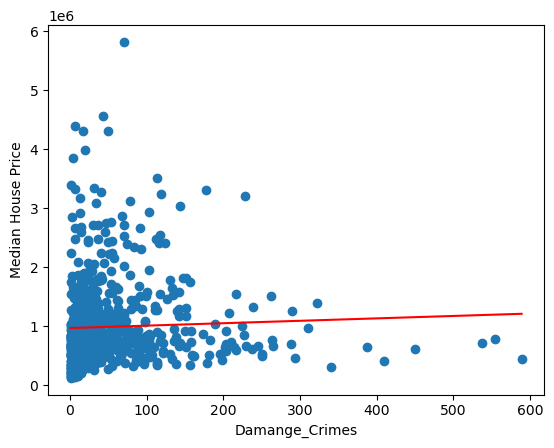

In [18]:
#correlation and regression plot
(slope, intercept, rvalue, pvalue, sterr) = st.linregress(damagesummed_data_2022["Damange_Crimes"], damagesummed_data_2022["Median"])
regress_values = damagesummed_data_2022["Damange_Crimes"] * slope + intercept
plt.plot(damagesummed_data_2022["Damange_Crimes"],regress_values,color = "red")                                                                                                         
Damages = damagesummed_data_2022["Damange_Crimes"]
Median = damagesummed_data_2022["Damange_Crimes"]
correlation = st.pearsonr(Damages,Median)
plt.scatter(damagesummed_data_2022["Damange_Crimes"], damagesummed_data_2022["Median"])
plt.xlabel("Damange_Crimes")
plt.ylabel("Median House Price")
print(f"The correlation between Damage Crimes and Median House Price is {round(correlation[0],2)}")
plt.show()

In [14]:
#load csv
drugs_to_load = "Resources/C Drug offences.csv"

In [15]:
#read csv
drugs_property_merged = pd.read_csv(drugs_to_load)
#drugs_property_merged

,Year,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Count,Median
0,2013,Yarra,3067,Abbotsford,C Drug offences,C10 Drug dealing and trafficking,18,792500
1,2013,Yarra,3067,Abbotsford,C Drug offences,C30 Drug use and possession,61,792500
2,2013,Moonee Valley,3042,Airport West,C Drug offences,C10 Drug dealing and trafficking,4,532000
3,2013,Moonee Valley,3042,Airport West,C Drug offences,C20 Cultivate or manufacture drugs,9,532000
4,2013,Moonee Valley,3042,Airport West,C Drug offences,C30 Drug use and possession,21,532000
...,...,...,...,...,...,...,...,...
16134,2022,Maribyrnong,3013,Yarraville,C Drug offences,C30 Drug use and possession,55,1350000
16135,2022,Moira,3730,Yarrawonga,C Drug offences,C10 Drug dealing and trafficking,10,695000
16136,2022,Moira,3730,Yarrawonga,C Drug offences,C20 Cultivate or manufacture drugs,2,695000
16137,2022,Moira,3730,Yarrawonga,C Drug offences,C30 Drug use and possession,28,695000


In [16]:
#filter by drug dealing
drugs_data = drugs_property_merged[drugs_property_merged["Offence Subdivision"] == "C10 Drug dealing and trafficking"]
groupeddrugs_data = drugs_data.groupby("Offence Count").count()
drugs_data.head(25)

,Year,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Count,Median
0,2013,Yarra,3067,Abbotsford,C Drug offences,C10 Drug dealing and trafficking,18,792500
2,2013,Moonee Valley,3042,Airport West,C Drug offences,C10 Drug dealing and trafficking,4,532000
5,2013,Brimbank,3021,Albanvale,C Drug offences,C10 Drug dealing and trafficking,3,313000
10,2013,Brimbank,3020,Albion,C Drug offences,C10 Drug dealing and trafficking,6,379000
13,2013,Murrindindi,3714,Alexandra,C Drug offences,C10 Drug dealing and trafficking,6,261000
16,2013,Ballarat,3350,Alfredton,C Drug offences,C10 Drug dealing and trafficking,4,361500
19,2013,Moyne,3277,Allansford,C Drug offences,C10 Drug dealing and trafficking,1,310000
21,2013,Darebin,3078,Alphington,C Drug offences,C10 Drug dealing and trafficking,5,1080000
24,2013,Hobsons Bay,3018,Altona,C Drug offences,C10 Drug dealing and trafficking,1,575000
27,2013,Hobsons Bay,3028,Altona Meadows,C Drug offences,C10 Drug dealing and trafficking,9,390000


In [17]:
#group by suburb
drsummed_data = drugs_data.groupby(["Suburb/Town Name", "Year"])["Offence Count", "Median"].sum().reset_index()
drsummed_data = drsummed_data.rename(columns={"Offence Count": " Drug dealing and trafficking", "Suburb/Town Name": "Suburb"})
drsummed_data.head(20)

C:\Users\shang\AppData\Local\Temp\ipykernel_11372\655787725.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  drsummed_data = drugs_data.groupby(["Suburb/Town Name", "Year"])["Offence Count", "Median"].sum().reset_index()


,Suburb,Year,Drug dealing and trafficking,Median
0,Abbotsford,2013,18,792500
1,Abbotsford,2014,9,862500
2,Abbotsford,2015,14,925000
3,Abbotsford,2016,7,1187500
4,Abbotsford,2017,7,1280000
5,Abbotsford,2018,24,1192500
6,Abbotsford,2019,40,1050000
7,Abbotsford,2020,37,1200000
8,Abbotsford,2021,32,1375000
9,Abbotsford,2022,27,1517500


In [19]:
# Data from the year 2022 only
drsummed_data_2022 = drugs_data[drugs_data["Year"] == 2022].groupby(["Year", "Suburb/Town Name"])[["Offence Count", "Median"]].sum().reset_index()
drsummed_data_2022 = drsummed_data_2022.rename(columns={"Offence Count": "Drug dealing and trafficking", "Suburb/Town Name": "Suburb"})
drsummed_data_2022 = drsummed_data_2022.sort_values(["Drug dealing and trafficking"] , ascending=False)
drsummed_data_2022.head(50)

,Year,Suburb,Drug dealing and trafficking,Median
349,2022,Shepparton,271,405000
204,2022,Hughesdale,114,1625000
364,2022,St Kilda,100,1515000
362,2022,St Albans,64,702500
328,2022,Reservoir,57,966000
329,2022,Richmond,50,1385000
163,2022,Frankston,46,779000
414,2022,Werribee,42,620500
283,2022,Morwell,42,315000
268,2022,Mildura,40,439500


The correlation between Drug Dealing Crimes and Median House Price is 1.0


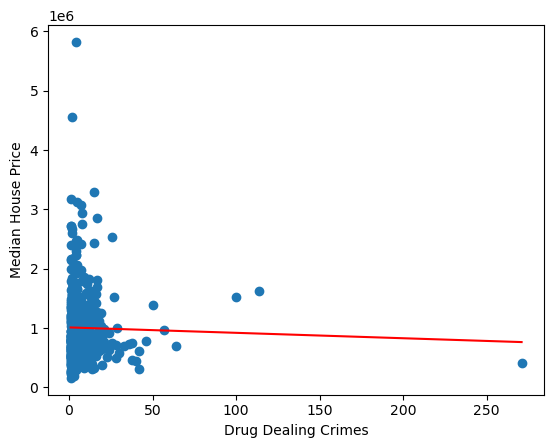

In [22]:
#correlation and regression plot
(slope, intercept, rvalue, pvalue, sterr) = st.linregress(drsummed_data_2022["Drug dealing and trafficking"], drsummed_data_2022["Median"])
regress_values = drsummed_data_2022["Drug dealing and trafficking"] * slope + intercept
plt.plot(drsummed_data_2022["Drug dealing and trafficking"],regress_values,color = "red")                                                                                                         
Deals = drsummed_data_2022["Drug dealing and trafficking"]
Median = drsummed_data_2022["Drug dealing and trafficking"]
correlation = st.pearsonr(Deals,Median)
plt.scatter(drsummed_data_2022["Drug dealing and trafficking"], drsummed_data_2022["Median"])
plt.xlabel("Drug Dealing Crimes")
plt.ylabel("Median House Price")
print(f"The correlation between Drug Dealing Crimes and Median House Price is {round(correlation[0],2)}")
plt.show()

In [23]:
#load csv
crime_data_to_load = "Resources/A Crimes against the person.csv"

In [24]:
#read csv
crime_property_merged = pd.read_csv(crime_data_to_load)

In [25]:
#filter by assault
assault_data = crime_property_merged[crime_property_merged["Offence Subdivision"] == "A20 Assault and related offences"]
grouped_data = assault_data.groupby("Offence Count").count()
assault_data.head()

,Year,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Count,Median
0,2013,Yarra,3067,Abbotsford,A Crimes against the person,A20 Assault and related offences,40,792500
5,2013,Moonee Valley,3040,Aberfeldie,A Crimes against the person,A20 Assault and related offences,11,947500
12,2013,Moonee Valley,3042,Airport West,A Crimes against the person,A20 Assault and related offences,41,532000
17,2013,Brimbank,3021,Albanvale,A Crimes against the person,A20 Assault and related offences,42,313000
22,2013,Port Phillip,3206,Albert Park,A Crimes against the person,A20 Assault and related offences,26,1360000


In [26]:
#assault groupby
summed_data = assault_data.groupby(["Suburb/Town Name", "Year"])["Offence Count", "Median"].sum().reset_index()
summed_data = summed_data.rename(columns={"Offence Count": "Total Assault Offences", "Suburb/Town Name": "Suburb"})
summed_data.head(20)

C:\Users\shang\AppData\Local\Temp\ipykernel_11372\2267480992.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summed_data = assault_data.groupby(["Suburb/Town Name", "Year"])["Offence Count", "Median"].sum().reset_index()


,Suburb,Year,Total Assault Offences,Median
0,Abbotsford,2013,40,792500
1,Abbotsford,2014,49,862500
2,Abbotsford,2015,48,925000
3,Abbotsford,2016,72,1187500
4,Abbotsford,2017,79,1280000
5,Abbotsford,2018,61,1192500
6,Abbotsford,2019,98,1050000
7,Abbotsford,2020,82,1200000
8,Abbotsford,2021,90,1375000
9,Abbotsford,2022,100,1517500


In [27]:
# Data from the year 2022 only
summed_data_2022 = assault_data[assault_data["Year"] == 2022].groupby(["Year", "Suburb/Town Name"])[["Offence Count", "Median"]].sum().reset_index()
summed_data_2022 = summed_data_2022.rename(columns={"Offence Count": "2022 Assaults", "Suburb/Town Name": "Suburb", "Median": "2022Median"})
# summed_data_2013.sort_values(by="Total Assault Offences" , ascending=False).tail(50)
summed_data_2022.head(50)

,Year,Suburb,2022 Assaults,2022Median
0,2022,Abbotsford,100,1517500
1,2022,Aberfeldie,14,1575000
2,2022,Aintree,33,760000
3,2022,Aireys Inlet,1,1750000
4,2022,Airport West,39,919500
5,2022,Albanvale,43,605000
6,2022,Albert Park,29,2076000
7,2022,Albion,32,785000
8,2022,Alexandra,14,545000
9,2022,Alfredton,57,700000


The correlation between Assaults and Median House Price is 1.0


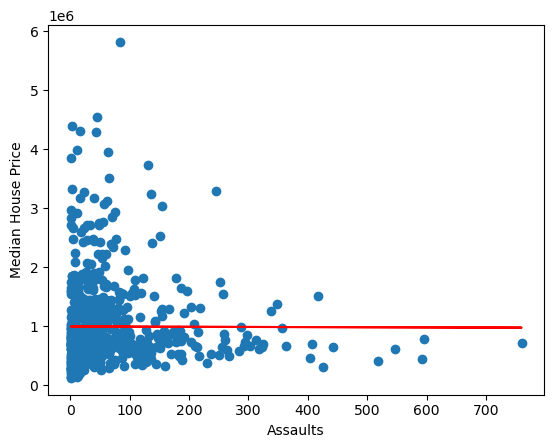

In [29]:
#correlation and regression plot
(slope, intercept, rvalue, pvalue, sterr) = st.linregress(summed_data_2022["2022 Assaults"], summed_data_2022["2022Median"])
regress_values = summed_data_2022["2022 Assaults"] * slope + intercept
plt.plot(summed_data_2022["2022 Assaults"],regress_values,color = "red")                                                                                                         
Assault = summed_data_2022["2022 Assaults"]
Median = summed_data_2022["2022 Assaults"]
correlation = st.pearsonr(Assault,Median)
plt.scatter(summed_data_2022["2022 Assaults"], summed_data_2022["2022Median"])
plt.xlabel("Assaults")
plt.ylabel("Median House Price")
print(f"The correlation between Assaults and Median House Price is {round(correlation[0],2)}")
plt.show()

In [30]:
#first merge
merge1_2022 = pd.merge(summed_data_2022, drsummed_data_2022, on=["Suburb"])
merge1_2022 = merge1_2022 .drop(["2022Median", "Year_y"], axis =1)
merge1_2022

,Year_x,Suburb,2022 Assaults,Drug dealing and trafficking,Median
0,2022,Abbotsford,100,27,1517500
1,2022,Aintree,33,1,760000
2,2022,Airport West,39,2,919500
3,2022,Albanvale,43,11,605000
4,2022,Albert Park,29,3,2076000
...,...,...,...,...,...
432,2022,Yallourn North,20,14,302500
433,2022,Yarragon,12,1,595000
434,2022,Yarram,38,1,452500
435,2022,Yarraville,63,13,1350000


In [31]:
#second merge
merge2_2022 = pd.merge(merge1_2022, theftsummed_data_2022, on=["Suburb"])
merge2_2022 = merge2_2022 .drop(["Median_x", "Year"], axis =1)
merge2_2022

,Year_x,Suburb,2022 Assaults,Drug dealing and trafficking,Thefts,Median_y
0,2022,Abbotsford,100,27,530,1517500
1,2022,Aintree,33,1,122,760000
2,2022,Airport West,39,2,404,919500
3,2022,Albanvale,43,11,93,605000
4,2022,Albert Park,29,3,273,2076000
...,...,...,...,...,...,...
432,2022,Yallourn North,20,14,25,302500
433,2022,Yarragon,12,1,54,595000
434,2022,Yarram,38,1,39,452500
435,2022,Yarraville,63,13,399,1350000


In [32]:
#third merge
merge3_2022 = pd.merge(merge2_2022, damagesummed_data_2022, on=["Suburb"])
merge3_2022 = merge3_2022 .drop(["Median_y", "Year"], axis =1)
merge3_2022

,Year_x,Suburb,2022 Assaults,Drug dealing and trafficking,Thefts,Damange_Crimes,Median
0,2022,Abbotsford,100,27,530,99,1517500
1,2022,Aintree,33,1,122,20,760000
2,2022,Airport West,39,2,404,62,919500
3,2022,Albanvale,43,11,93,25,605000
4,2022,Albert Park,29,3,273,23,2076000
...,...,...,...,...,...,...,...
430,2022,Yallourn North,20,14,25,8,605000
431,2022,Yarragon,12,1,54,16,595000
432,2022,Yarram,38,1,39,38,452500
433,2022,Yarraville,63,13,399,86,1350000


In [33]:
#merge3_2022 = merge3_2022.sort_values(["2022 Assaults"] , ascending=False)
#merge3_2022.head(15)


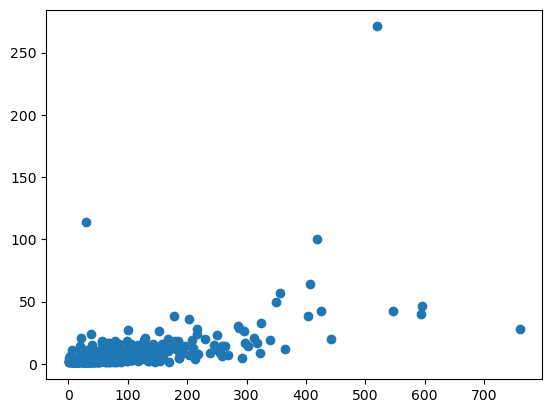

In [34]:
# Scatter Plot
plt.scatter(merge3_2022["2022 Assaults"], merge3_2022["Drug dealing and trafficking"])

#plt.title("Total Number Of Assault Offences by Suburb for the Year 2013")
#plt.ylabel("Median")
#plt.xlabel("Assult Offences")

#plt.xticks(rotation=60)
plt.show()

The correlation between Assaults and Drug dealing and trafficking is 0.56


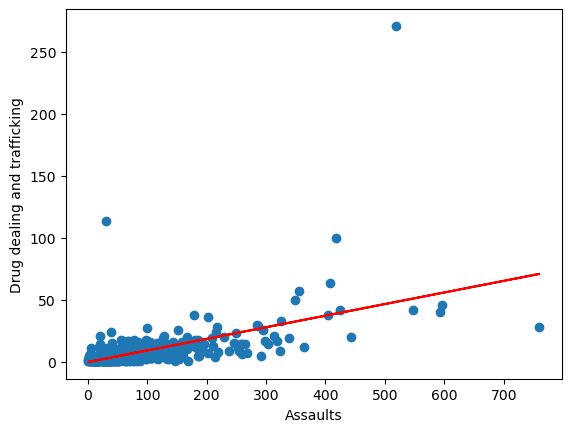

In [35]:
#correlation and regression plot
(slope, intercept, rvalue, pvalue, sterr) = st.linregress(merge3_2022["2022 Assaults"], merge3_2022["Drug dealing and trafficking"])
regress_values = merge3_2022["2022 Assaults"] * slope + intercept
plt.plot(merge3_2022["2022 Assaults"],regress_values,color = "red")                                                                                                         
Assaults = merge3_2022["2022 Assaults"]
Drugs = merge3_2022["Drug dealing and trafficking"]
correlation = st.pearsonr(Assaults,Drugs)
plt.scatter(merge3_2022["2022 Assaults"], merge3_2022["Drug dealing and trafficking"])
plt.xlabel("Assaults")
plt.ylabel("Drug dealing and trafficking")
print(f"The correlation between Assaults and Drug dealing and trafficking is {round(correlation[0],2)}")
plt.show()

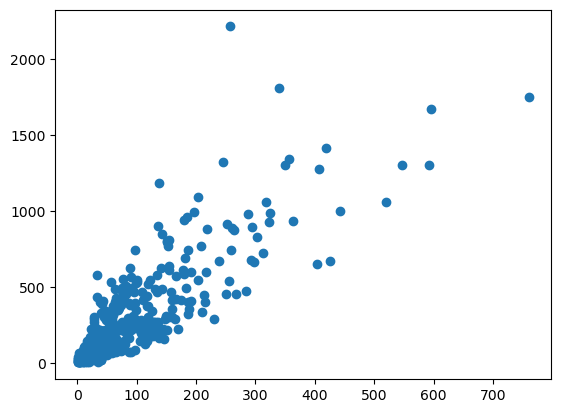

In [36]:
# Scatter Plot
plt.scatter(merge3_2022["2022 Assaults"], merge3_2022["Thefts"])
plt.show()

The correlation between Assaults and Theft is 0.84


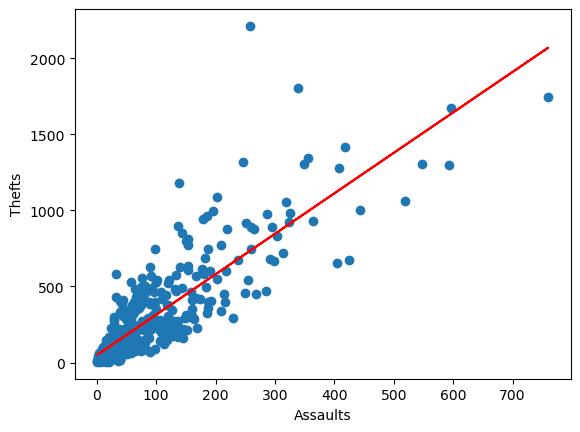

In [37]:
#correlation and regression plot
(slope, intercept, rvalue, pvalue, sterr) = st.linregress(merge3_2022["2022 Assaults"], merge3_2022["Thefts"])
regress_values = merge3_2022["2022 Assaults"] * slope + intercept
plt.plot(merge3_2022["2022 Assaults"],regress_values,color = "red")                                                                                                         
Assaults = merge3_2022["2022 Assaults"]
Theft = merge3_2022["Thefts"]
correlation = st.pearsonr(Assaults,Theft)
plt.scatter(merge3_2022["2022 Assaults"], merge3_2022["Thefts"])
plt.xlabel("Assaults")
plt.ylabel("Thefts")
print(f"The correlation between Assaults and Theft is {round(correlation[0],2)}")
plt.show()

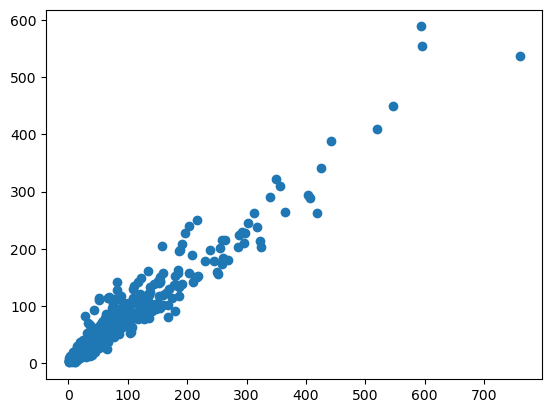

In [38]:
# Scatter Plot
plt.scatter(merge3_2022["2022 Assaults"], merge3_2022["Damange_Crimes"])
plt.show()

The correlation between Assaults and Property Damage is 0.96


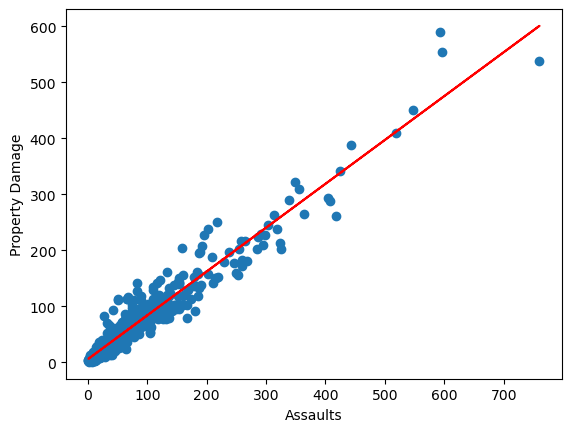

In [39]:
#correlation and regression plot
(slope, intercept, rvalue, pvalue, sterr) = st.linregress(merge3_2022["2022 Assaults"], merge3_2022["Damange_Crimes"])
regress_values = merge3_2022["2022 Assaults"] * slope + intercept
plt.plot(merge3_2022["2022 Assaults"],regress_values,color = "red")                                                                                                         
Assaults = merge3_2022["2022 Assaults"]
Property_Damage = merge3_2022["Damange_Crimes"]
correlation = st.pearsonr(Assaults,Property_Damage)
plt.scatter(merge3_2022["2022 Assaults"], merge3_2022["Damange_Crimes"])
plt.xlabel("Assaults")
plt.ylabel("Property Damage")
print(f"The correlation between Assaults and Property Damage is {round(correlation[0],2)}")
plt.show()

# Merged Data
The `Resources` folder contains the following working csv files:
- `A Crimes against the person.csv`
- `B Property and deception offences.csv`
- `C Drug offences.csv`
- `D Public order and security offences.csv`
- `E Justice procedures offences.csv`
- `F Other offences.csv`

Each is a merge of cleaned crimes inner joined to cleaned property by matching suburb name.